In [1]:
import pandas as pd
df=pd.read_csv('c:/data/school/data.csv')
df.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score,Label
0,12.4,95.6,10.6,13.3,33.3,5226,14.1,0.82,59.8,0
1,29.9,90.1,20.1,65.3,33.9,2473,15.6,0.63,59.8,0
2,24.7,82.6,18.9,43.5,28.4,2473,15.6,0.63,59.8,0
3,61.3,98.6,67.5,94.6,65.4,9666,10.5,0.54,76.1,1
4,62.4,98.8,57.0,95.0,49.8,9666,10.5,0.54,73.0,1


In [2]:
train_cols=df.columns[0:8]
X=df[train_cols]
y=df["Label"]

In [3]:
df["Label"].value_counts()

0    2158
1     445
Name: Label, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0:bad, 1: good)')

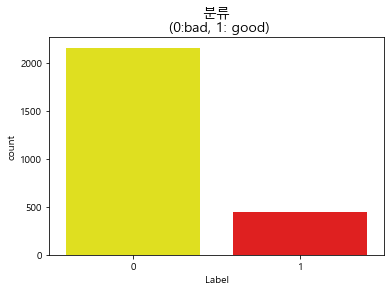

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns
colors=["yellow","red"]
sns.countplot('Label', data=df, palette=colors)
plt.title('분류\n (0:bad, 1: good)',fontsize=14)

In [5]:
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Label'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [6]:
df_samp["Label"].value_counts()

0    445
1    445
Name: Label, dtype: int64

In [7]:
X=df_samp[train_cols]
y=df_samp['Label']

In [8]:
import statsmodels.api as sm
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.263067
         Iterations 8
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.620      
Dependent Variable:   Label             AIC:               484.2592   
Date:                 2021-12-16 12:10  BIC:               522.5889   
No. Observations:     890               Log-Likelihood:    -234.13    
Df Model:             7                 LL-Null:           -616.90    
Df Residuals:         882               LLR p-value:       5.0478e-161
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       8.0000                                          
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
teaching               -0.0665   0.0155 -4.2972 0.0000 -0.0969 -0.0362
int

In [9]:
cols=['teaching', 'international', 'research', 'income',
'num_students', 'student_staff_ratio','international_students']
X=df_samp[cols]
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.263068
         Iterations 8
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.620      
Dependent Variable:   Label             AIC:               482.2606   
Date:                 2021-12-16 12:10  BIC:               515.7991   
No. Observations:     890               Log-Likelihood:    -234.13    
Df Model:             6                 LL-Null:           -616.90    
Df Residuals:         883               LLR p-value:       4.2846e-162
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       8.0000                                          
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
teaching               -0.0668   0.0139 -4.8183 0.0000 -0.0940 -0.0396
int

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

pipe=Pipeline([('scaler',StandardScaler()),('clf',LogisticRegression(random_state=0)),])
params={'clf__C': [0.0001,0.001,0.01,0.1,1.0,10,100],}
grid=GridSearchCV(pipe,params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 100}
0.9156770406770406


In [11]:
scores=[]

In [12]:
scores.append(grid.best_score_)
scores

[0.9156770406770406]

In [13]:
from sklearn.tree import DecisionTreeClassifier
pipe=Pipeline([
    ('scaler', StandardScaler()),
    ('clf',DecisionTreeClassifier(random_state=0)),
])
params={
    'clf__max_depth': list(range(3,6))
}
grid=GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 3}
0.7817135317135318


In [14]:
scores.append(grid.best_score_)
scores

[0.9156770406770406, 0.7817135317135318]

In [15]:
tree=grid.best_estimator_['clf']

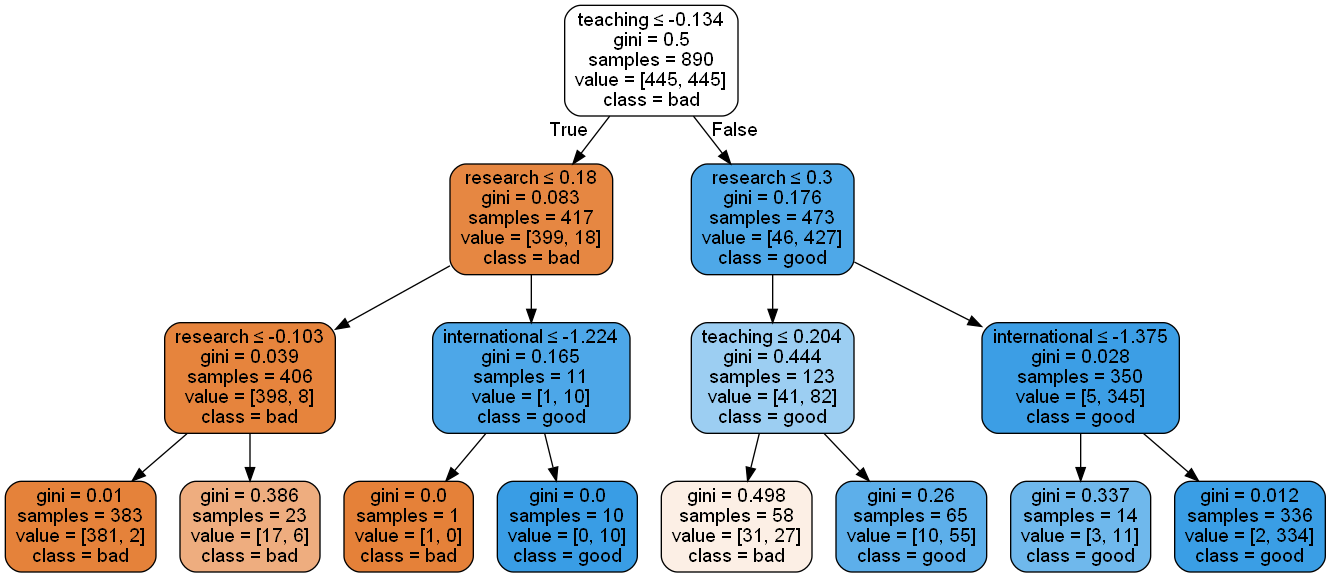

In [16]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

dot_data=export_graphviz(tree, out_file=None, feature_names=cols,
class_names=["bad","good"],filled=True,rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

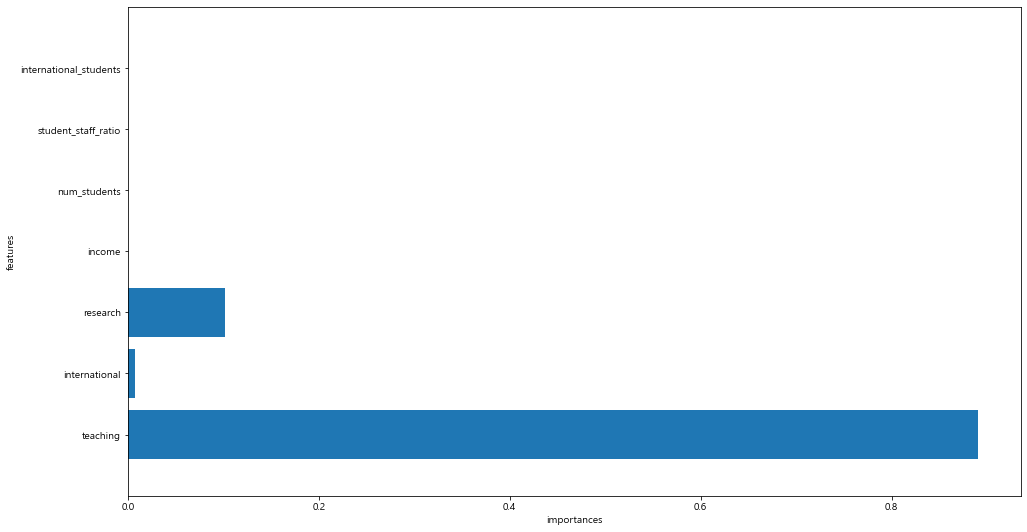

In [17]:
import numpy as np
def plot_tree(model):
    n_features=X.shape[1]
    plt.rcParams["figure.figsize"]=(16,9)
    plt.barh(range(n_features), model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features), cols)
    plt.xlabel("importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)
plot_tree(tree)

In [18]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', RandomForestClassifier(random_state=0)),
])
params = {
'clf__max_depth': list(range(3,6)),
'clf__n_estimators': list(range(10,110,10)),
}
grid=GridSearchCV(pipe,params,scoring='accuracy',cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 4, 'clf__n_estimators': 20}
0.7918259168259167


In [19]:
scores.append(grid.best_score_)
scores

[0.9156770406770406, 0.7817135317135318, 0.7918259168259167]

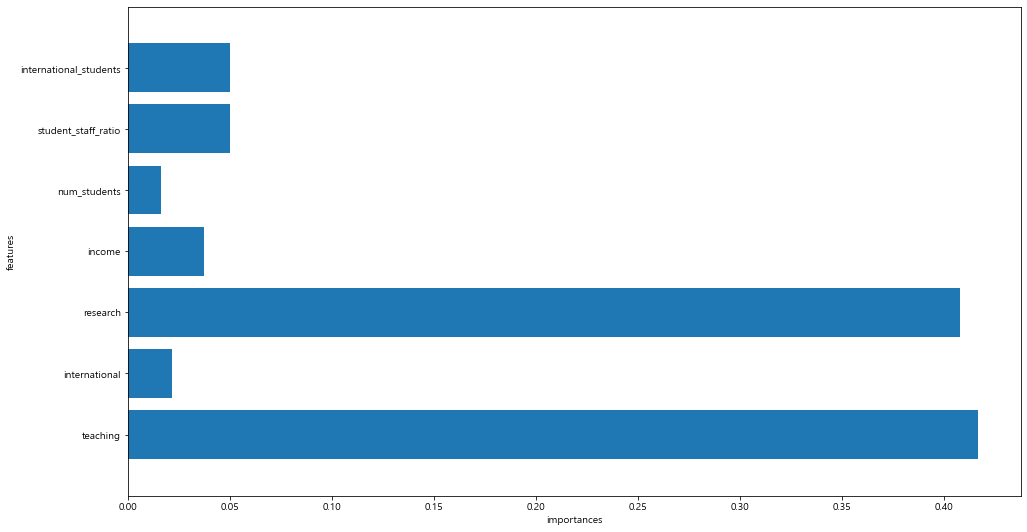

In [20]:
rf=grid.best_estimator_['clf']
plot_tree(rf)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', KNeighborsClassifier()),
])
params = {
'clf__n_neighbors': list(range(1,11)),
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__n_neighbors': 9}
0.8280401613734947


In [22]:
scores.append(grid.best_score_)
scores

[0.9156770406770406,
 0.7817135317135318,
 0.7918259168259167,
 0.8280401613734947]

In [23]:
from sklearn.neural_network import MLPClassifier

pipe = Pipeline([
('scaler', StandardScaler()),
('clf', MLPClassifier(random_state=0, max_iter=1000)),
])
params = {
'clf__hidden_layer_sizes': [(50,), (100,), (50,50),
(100,100)],
'clf__activation': ['tanh', 'relu'],
'clf__alpha': [0.001, 0.01, 0.1]
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__activation': 'tanh', 'clf__alpha': 0.1, 'clf__hidden_layer_sizes': (100,)}
0.9100539933873266


In [24]:
scores.append(grid.best_score_)
scores

[0.9156770406770406,
 0.7817135317135318,
 0.7918259168259167,
 0.8280401613734947,
 0.9100539933873266]

In [25]:
from sklearn.svm import SVC
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', SVC(random_state=0)),
])
params = {
'clf__C': [0.001,0.01,0.1,1,10,100,1000],
'clf__gamma': [0.0001,0.001, 0.01, 0.1]
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 1000, 'clf__gamma': 0.0001}
0.9111725361725362


In [26]:
scores.append(grid.best_score_)
scores

[0.9156770406770406,
 0.7817135317135318,
 0.7918259168259167,
 0.8280401613734947,
 0.9100539933873266,
 0.9111725361725362]

In [ ]:
import mglearn
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
idx=0
for k in [2,3,4,5]:
    km = KMeans(n_clusters=k)
    km.fit(X)
    lbls = km.labels_
    mglearn.discrete_scatter(X["teaching"], X["num_students"], lbls, ax=axes[idx])
    idx+=1


['LOGIT', 'Tree', 'RF', 'KNN', 'ANN', 'SVM']
[0.91567704 0.78171353 0.79182592 0.82804016 0.91005399 0.91117254]
최적의 알고리즘: LOGIT
최적의 정확도: 0.9156770406770406


Text(0, 0.5, 'Accuracy')

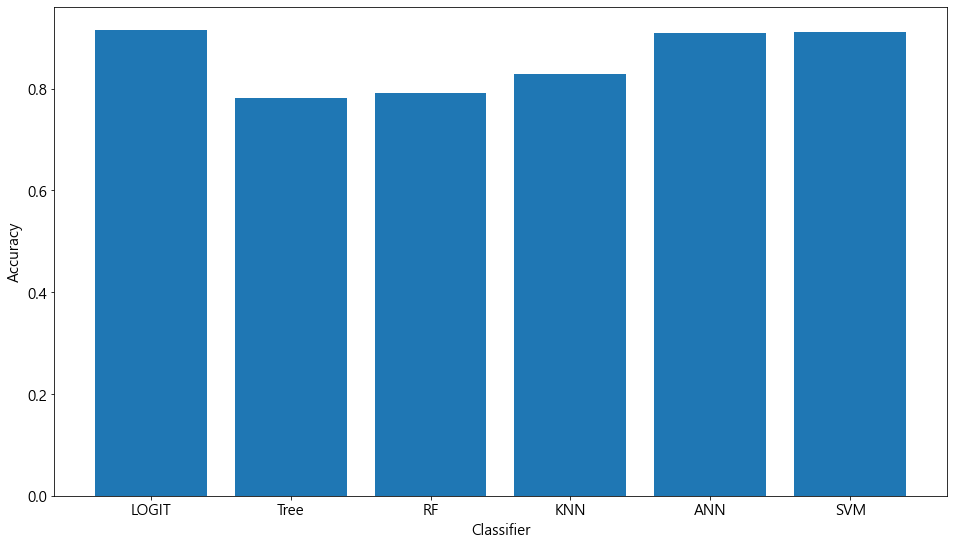

In [28]:
methods=["LOGIT","Tree","RF","KNN","ANN","SVM"]

scores_arr=np.array(scores) 
max_rate=np.max(scores_arr) 
idx=np.argmax(scores_arr) 

print(methods)
print(scores_arr)
print("최적의 알고리즘:",methods[idx]) 
print("최적의 정확도:",max_rate)


plt.rcParams["font.size"]=15
plt.bar(methods, scores_arr)
plt.xlabel("Classifier") 
plt.ylabel("Accuracy") 